# DESAFIO MODELO PROPERATTI

In [1]:
import pandas as pd
import Util as utl

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### SE PONEN NULLABLE LOS OUTLIERS Y SON IMPUTADOS   .......... z-score  [0.80]

In [2]:
#data = pd.read_csv('/home/DS-DH/jupyter/digitalHouse/properatti.csv')
#data = utl.limpiarDatos(data,0.80)
data = pd.read_csv('/home/DS-DH/jupyter/digitalHouse/data.csv',sep='|')
#data.to_csv('/home/DS-DH/jupyter/digitalHouse/data.csv',sep='|')
matriz = utl.GenerarMatriz(data)

#### SE GENERAN LAS DUMMYS PARA EL MODELO

In [3]:
modeloMatriz = utl.generarDummies(matriz)
modeloMatriz.shape

(10064, 77)

#### SE LIMPIAN VARIABLES APLICANDO RECURSIVAMENtE LASSO

In [4]:
#modeloMatriz_2 = utl.eliminar_features_lasso(modeloMatriz)
#modeloMatriz_2.shape

#### SE LIMPIAN VARIABLES CON CORRELACION BAJA 

In [4]:
modeloMatriz_30_variables = utl.eliminar_features(modeloMatriz)
modeloMatriz_30_variables.shape

(10064, 31)

#### STATS MODELS

In [5]:
utl.summary(modeloMatriz_30_variables)

EMC: 107206.54330708309
                            OLS Regression Results                            
Dep. Variable:              precio_m2   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     572.6
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        15:30:16   Log-Likelihood:                -28928.
No. Observations:                4025   AIC:                         5.792e+04
Df Residuals:                    3995   BIC:                         5.810e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### Regresion Lineal Multiple

/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:243: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:245: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


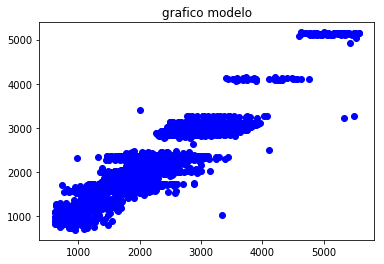

CROSS VALIDATION: 0.7775204297287929 0.8063524224328286 0.8205588505693219 0.7974227273614247 0.7993166499027599
MAE: 262.1040677319604
MSE: 105560.1175217529
RMSE: 324.90016546895276
EL R2 TRAIN ES DE:  0.8039376814491173
EL R2 TEST ES DE:  0.8022231508645818


In [6]:
modelo = utl.modelo_regresion_lineal(modeloMatriz_30_variables)

#### Regresion Ridge

/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:144: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:145: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


REGULARIZACION CON RIDGE
CROSS VALIDATION: 0.8091348354059331 0.8111309273377614 0.7981434819378495 0.7887693376983019 0.8008034191568578
MAE RIDGE: 258.82845337685796
MSE RIDGE: 104464.61752461133
RMSE RIDGE: 323.2098660694183
RIDGE -> R2 TRAIN:  0.8039692689433364
RIDGE -> R2 TEST:  0.801692640894096


(2023.2479554221509,
 array([-3.59230561e-01, -1.93810650e+01,  1.71500039e+00, -3.75334558e+02,
        -2.51717780e+02,  3.45601684e+02, -5.09649794e+02,  6.54846509e+02,
         5.93047774e+01,  7.50595824e+02, -2.98773283e+02, -6.24292910e+02,
        -4.25128660e+02,  5.77399430e+02, -1.38188897e+02, -3.48683810e+02,
        -3.17633147e+02,  9.39797666e+02,  7.57338927e+02,  2.77035514e+03,
         5.02152424e+02, -1.14086715e+01, -1.26797789e+02, -6.63357376e+02,
        -3.57521805e+02, -3.46431455e+02, -6.18227773e+02, -4.53788921e+02,
         1.08513599e+03, -8.55564719e+02]))

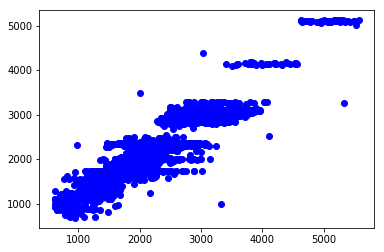

In [7]:
modelo_ridge = utl.modelo_ridge_cross_validation(modeloMatriz_30_variables)
(modelo_ridge.intercept_,modelo_ridge.coef_)

#### Lasso Regression

/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:108: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  xs = xs.as_matrix()
/home/DS-DH/jupyter/digitalHouse/modelo-properatti/Util.py:109: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


LASSO REGRESSION
CROSS VALIDATION: 0.8002014354247461 0.8179939899282583 0.830017599852243 0.8042073902663807 0.7776729977576942
MAE LASSO: 259.9259209232212
MSE LASSO: 103913.08388618226
RMSE LASSO: 322.3555240509805
LASSO -> R2 TRAIN:  0.8087930053826902
LASSO -> R2 TEST:  0.7932925105062443


(1750.5375385815698,
 array([-3.69026995e-01, -1.52703357e+00,  1.46060767e+01, -1.36946456e+02,
        -0.00000000e+00,  6.17910664e+02, -5.10451264e+02,  6.53211650e+02,
         3.65976593e+01,  7.34895917e+02, -2.93782597e+02, -6.16015732e+02,
        -4.51191295e+02,  5.98945367e+02, -1.39183629e+02, -3.32200452e+02,
        -3.12073410e+02,  9.23358917e+02,  7.60446192e+02,  2.75162578e+03,
         5.15850145e+02, -2.66829535e+01, -1.45926336e+02, -6.54289010e+02,
        -3.49553230e+02, -3.36936127e+02, -5.77633684e+02, -4.77020129e+02,
         1.14804508e+03, -7.49879881e+02]))

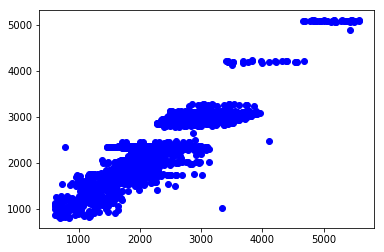

In [8]:
modelo_lasso = utl.modelo_lasso_cross_validation(modeloMatriz_30_variables)
(modelo_lasso.intercept_,modelo_lasso.coef_)

## PARAMETROS A PREDECIR
###### PARA LA PREDICCION DE PRECIOS POR M2 DE ALQUILERES EN CAPITAL FEDERAL
## NORMALIZAR O NO.. DEPENDE EL MODELO A USAR

In [8]:
SUPERFICIE_TOTAL = 30             ##  [0,600]
JARDIN = '0'                      ##  0,1
TERRAZA = '1'                     ##  0,1
CANTIDAD_DE_AMBIENTES = '1'       ##  1,2,3,4,4,5,6,7
TIPO_DE_PROPIEDAD = 'DTO'         ##  CASA, PH, DTO
BARRIO = 'belgrano'          ##  barrios de CABA, en minusculas

nuevos_Feactures = utl.nuevosDatos(modeloMatriz_3, SUPERFICIE_TOTAL, JARDIN, TERRAZA, CANTIDAD_DE_AMBIENTES, TIPO_DE_PROPIEDAD, BARRIO)
y_predict = modelo_lasso.predict(nuevos_Feactures)

'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE {} U$D POR M2'.format(y_predict[0].astype(int))


'EL RESULTADO DEL MODELO PARA LAS VARIABLES INGRESADAS ES DE 2277 U$D POR M2'

In [10]:
diccionario = {'modeloMatriz':modeloMatriz_30_variables,'multiple':modelo,'ridge':modelo_ridge,'lasso':modelo_lasso}

## GUARDAMOS EN PKL

In [14]:
import os
import pickle
with open('modelo.pkl', 'wb') as pkl:
    pickle.dump(diccionario, pkl)